In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("Data/DataPreparation.csv")
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,AAPL
1,2005-07-29,1.309160,1.333805,1.270090,1.281811,562080400,AAPL
2,2005-08-01,1.279407,1.294734,1.264680,1.284817,314249600,AAPL
3,2005-08-02,1.289024,1.307357,1.280609,1.298041,296875600,AAPL
4,2005-08-03,1.298040,1.301647,1.285417,1.298941,258322400,AAPL
...,...,...,...,...,...,...,...
25130,2025-07-16,160.300003,166.119995,159.800003,164.779999,22134800,JNJ
25131,2025-07-17,163.179993,164.699997,162.300003,162.979996,11295700,JNJ
25132,2025-07-18,163.929993,165.100006,163.360001,163.699997,9792600,JNJ
25133,2025-07-21,163.770004,164.919998,162.779999,164.360001,8254000,JNJ


In [3]:
data.isnull().sum() #Checking Null

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stocks    0
dtype: int64

In [4]:
data.duplicated().sum()#No Duplication

np.int64(0)

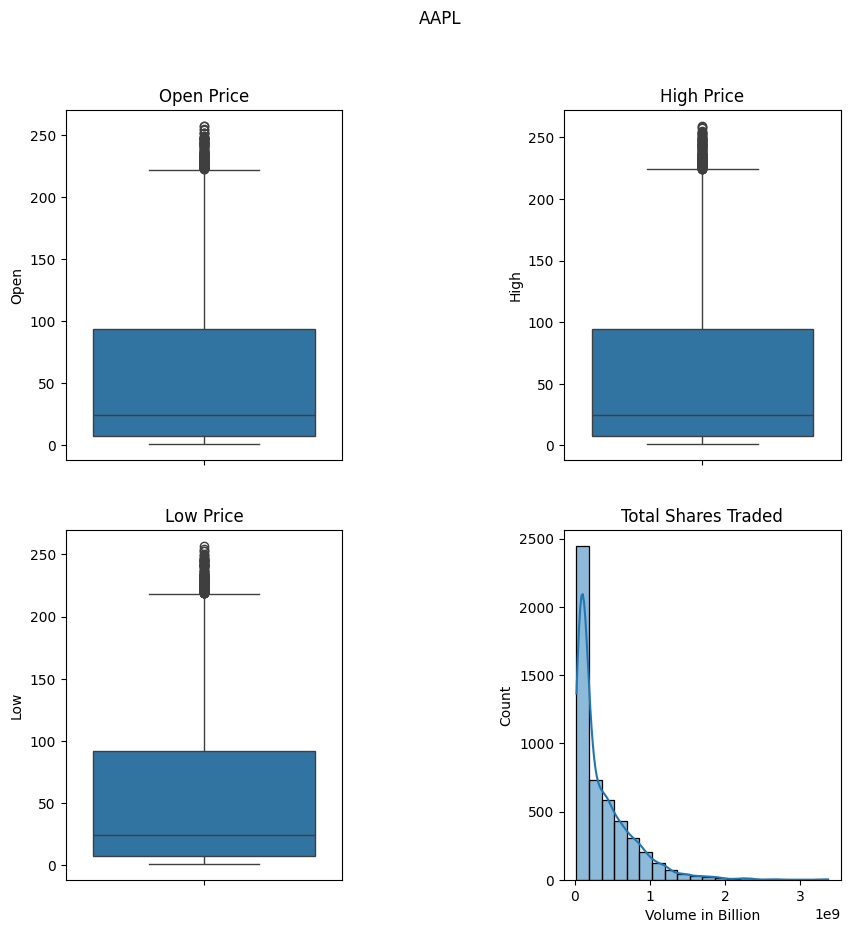

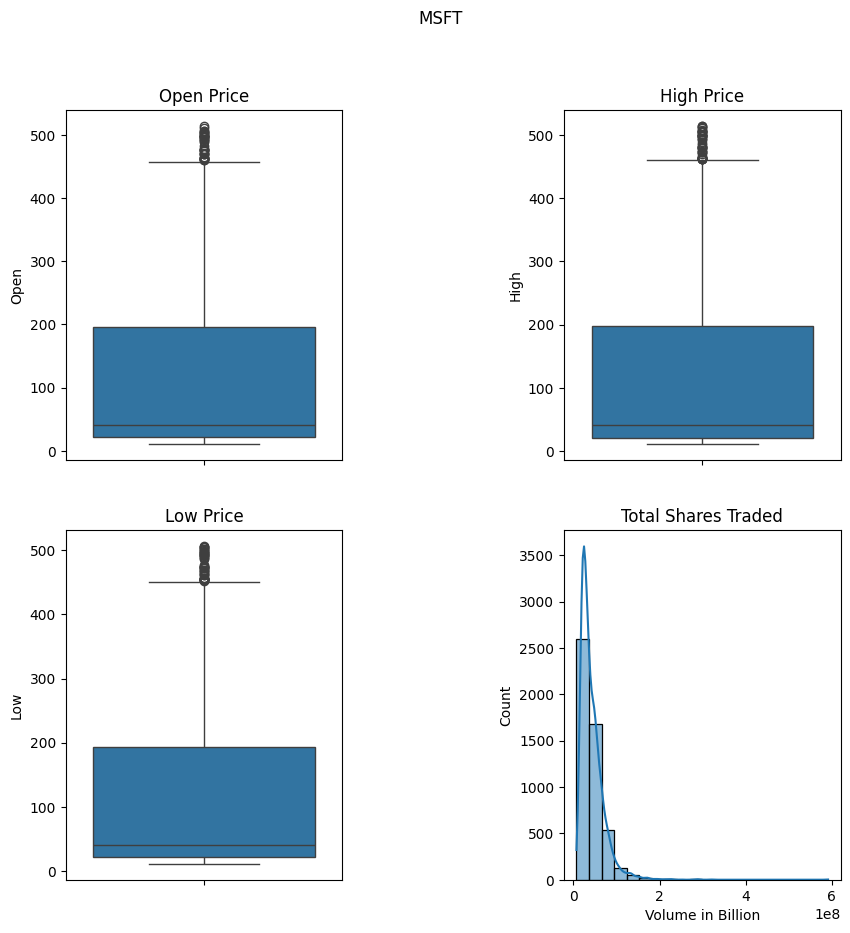

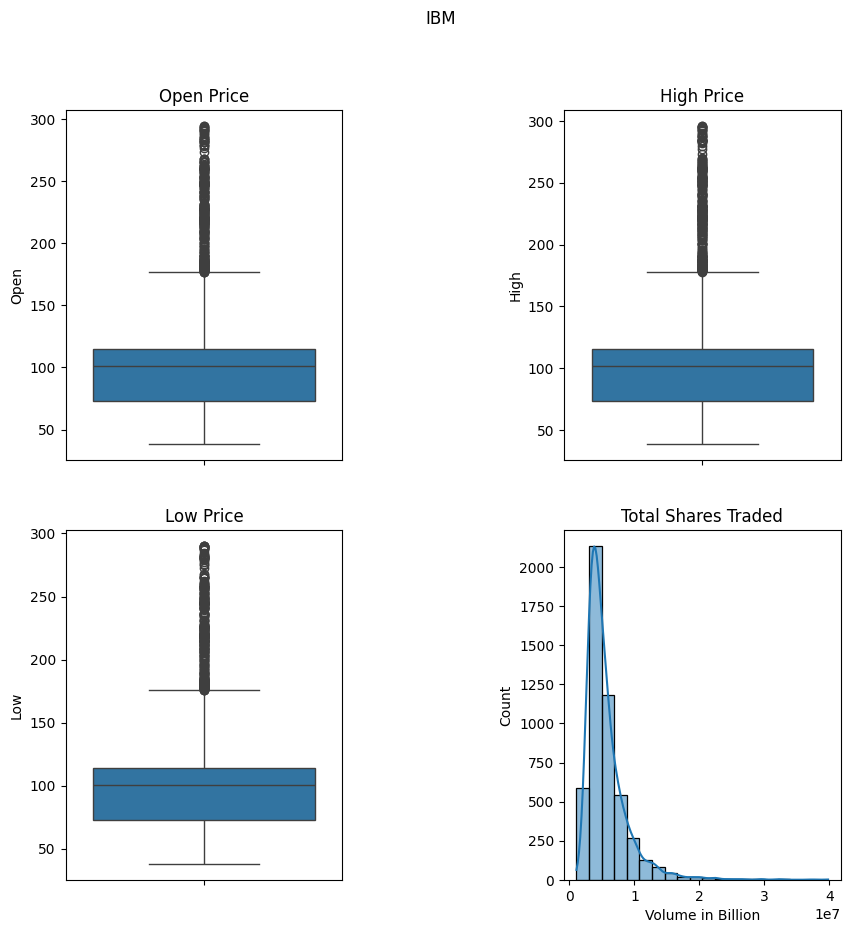

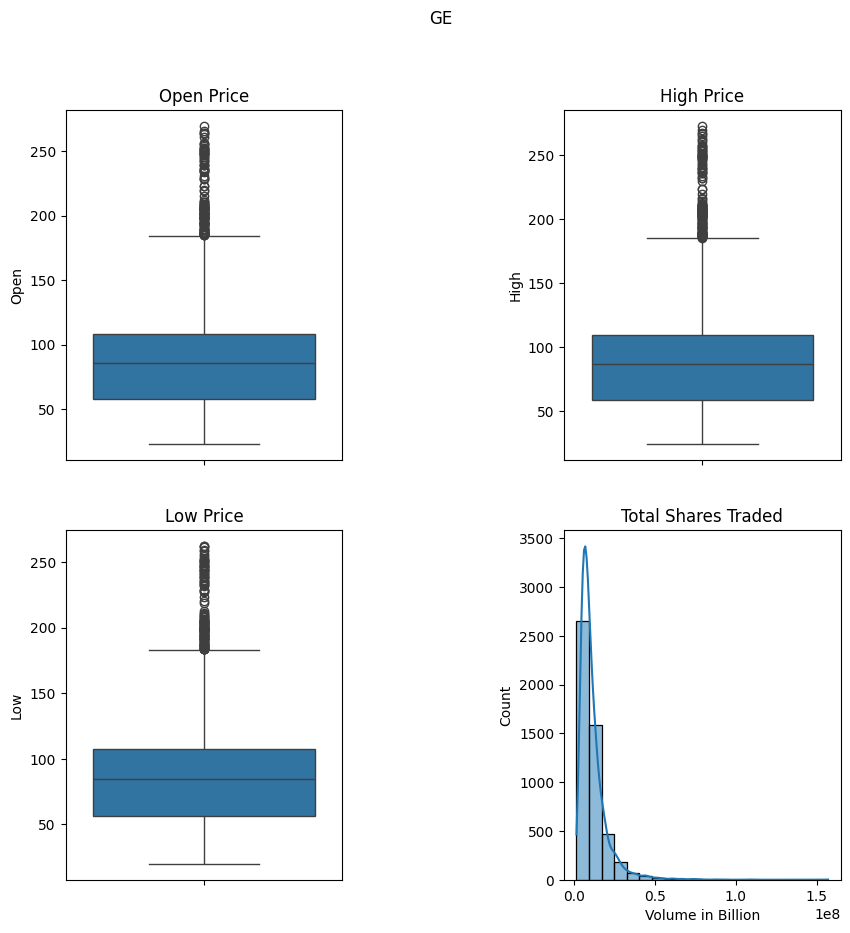

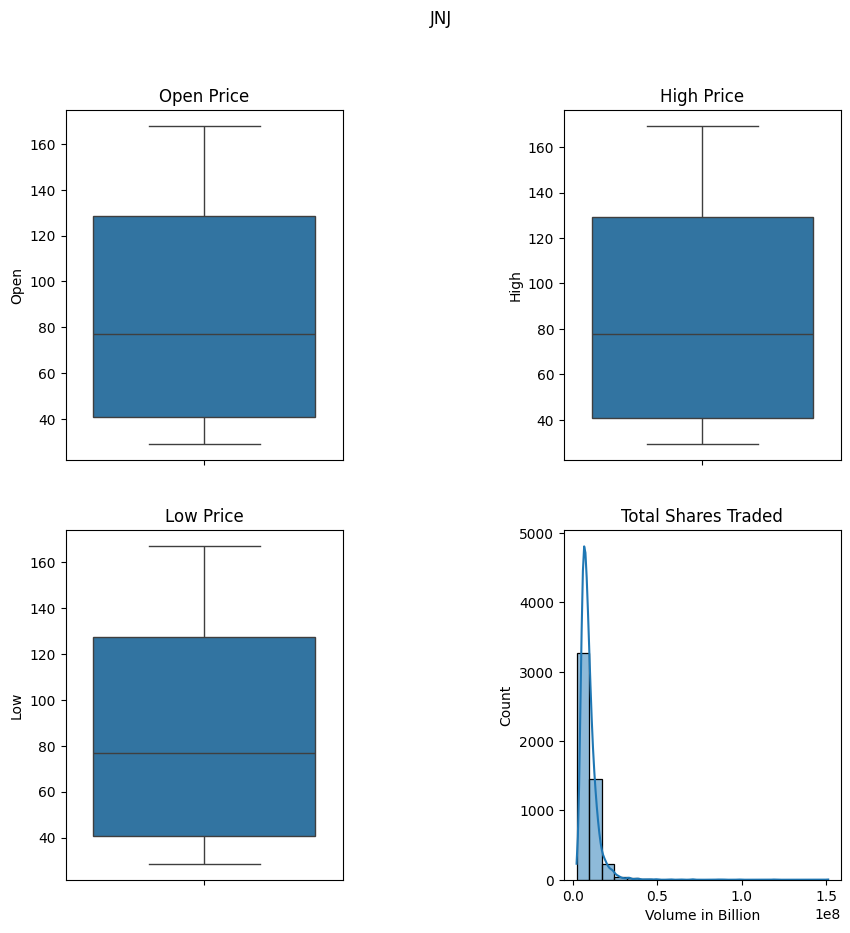

In [5]:
#Outliers Detection per stocks
for stocks in data["Stocks"].unique():
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
    fig.suptitle(f"{stocks}")
    plt.subplots_adjust(wspace=0.8)
    df = data[data["Stocks"]==stocks]
    sns.boxplot(df["Open"],ax=ax[0,0])
    sns.boxplot(df["High"],ax=ax[0,1])
    sns.boxplot(df["Low"],ax=ax[1,0])
    sns.histplot(df["Volume"],ax=ax[1,1],bins=20,kde=True)
    ax[0,0].set_title("Open Price")
    ax[0,1].set_title("High Price")
    ax[1,0].set_title("Low Price")
    ax[1,1].set_title("Total Shares Traded")
    ax[1,1].set_xlabel("Volume in Billion")
    # plt.savefig(f"Visuals/{stocks}_OutlierDetection",dpi=100)

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,25135.000000,25135.000000,25135.000000,25135.000000,2.513500e+04
mean,89.398871,90.213135,88.587866,89.431126,8.691049e+07
std,75.163414,75.852996,74.484950,75.217257,2.214728e+08
min,1.277002,1.292329,1.262876,1.281811,1.074765e+06
25%,37.392033,37.695051,37.059294,37.393946,6.287164e+06
50%,74.173361,74.781474,73.554837,74.205360,1.249190e+07
75%,116.123893,116.883283,115.208083,116.042679,4.984025e+07
max,514.479980,514.640015,507.429993,511.700012,3.372970e+09


In [7]:
#Renaming Stocks Names
stocks = list()
for i,j in enumerate(data["Stocks"]):
    if j=="AAPL":
        data.loc[i,"Stocks"]="Apple"
    elif j=="MSFT":
        data.loc[i,"Stocks"]="Microsoft"
    elif j=="JNJ":
        data.loc[i,"Stocks"]="Johnson&Johnson"
    elif j=="GE":
        data.loc[i,"Stocks"]="GeneralElectric"
    else:
        pass       

In [8]:
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,Apple
1,2005-07-29,1.309160,1.333805,1.270090,1.281811,562080400,Apple
2,2005-08-01,1.279407,1.294734,1.264680,1.284817,314249600,Apple
3,2005-08-02,1.289024,1.307357,1.280609,1.298041,296875600,Apple
4,2005-08-03,1.298040,1.301647,1.285417,1.298941,258322400,Apple
...,...,...,...,...,...,...,...
25130,2025-07-16,160.300003,166.119995,159.800003,164.779999,22134800,Johnson&Johnson
25131,2025-07-17,163.179993,164.699997,162.300003,162.979996,11295700,Johnson&Johnson
25132,2025-07-18,163.929993,165.100006,163.360001,163.699997,9792600,Johnson&Johnson
25133,2025-07-21,163.770004,164.919998,162.779999,164.360001,8254000,Johnson&Johnson


In [9]:
#Arranging DataSet
Data = pd.concat([data["Stocks"],data.iloc[:,[0,1,2,3,5]],data.iloc[:,[4]]],axis=1)
Data

,Stocks,Date,Open,High,Low,Volume,Close
0,Apple,2005-07-28,1.317876,1.322385,1.301347,251311200,1.316374
1,Apple,2005-07-29,1.309160,1.333805,1.270090,562080400,1.281811
2,Apple,2005-08-01,1.279407,1.294734,1.264680,314249600,1.284817
3,Apple,2005-08-02,1.289024,1.307357,1.280609,296875600,1.298041
4,Apple,2005-08-03,1.298040,1.301647,1.285417,258322400,1.298941
...,...,...,...,...,...,...,...
25130,Johnson&Johnson,2025-07-16,160.300003,166.119995,159.800003,22134800,164.779999
25131,Johnson&Johnson,2025-07-17,163.179993,164.699997,162.300003,11295700,162.979996
25132,Johnson&Johnson,2025-07-18,163.929993,165.100006,163.360001,9792600,163.699997
25133,Johnson&Johnson,2025-07-21,163.770004,164.919998,162.779999,8254000,164.360001


In [10]:
Data.corr(numeric_only=True)

,Open,High,Low,Volume,Close
Open,1.000000,0.999905,0.999904,-0.319382,0.999809
High,0.999905,1.000000,0.999860,-0.318957,0.999908
Low,0.999904,0.999860,1.000000,-0.319860,0.999905
Volume,-0.319382,-0.318957,-0.319860,1.000000,-0.319320
Close,0.999809,0.999908,0.999905,-0.319320,1.000000


In [11]:
Data["Date"] = pd.to_datetime(Data["Date"])

In [12]:
Data.to_csv("Data/Data-Validation.csv",index=False)

<h1><b>FINAL REPORT: DATA VALIDATION</b></h1>
<li>No Null Values Detected</li>
<li>No Duplicated Values</li>
<li>Outliers Detected in Features "open","high","low" and volume per Stocks however realistically possible in StockMarket-world applications and scenarios</li>
<li>Renamed Stocks Name but better convineince</li>
<li>Arranged Dataset for Separating Independent and Dependent Features</li>
<hr>
<b>Insights Gained:</b><br>
<b>AAPL</b>
<li>Potential Outliers in Apple StockMarket,shows right skewed graph for "High","Open","Low" i.e Values more than 200+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are  higher than 1 billion</li>
<b>MSFT</b>
<li>Potential Outliers in Microsoft StockMarket,shows right skewed graph for "High","Open","Low" i.e Values more than 450+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 50 Million </li>
<b>IBM</b>
<li>Extreme high Outliers in IBM StockMarket,shows an extreme right skewed range for "High","Open","Low" i.e Values more than 170+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 1 Million</li>
<b>GE</b>
<li>high Outliers in General Electric StockMarket similar to IBM,shows an extreme right skewed range for "High","Open","Low" i.e Values more than 170+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 30 Million</li>
<b>JNJ</b>
<li>No Potential Outliers Detected In JNJ</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 20 Million</li>
<hr>
<li>Negative Correlation between Volume and other Features</li>
<li>Features are highly co-related</li>
